In [1]:
import os
import re
# results_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_frames6'# iou = 69%
test_mask_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_5m6b'
test_frame_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_frames_5m6b_norm'
# plot_dir = '/home/yifanc3/segmentation_v2/DEM_segmentation/'


# results_dir = '/home/yifanc3/results/Model_norm/'
# test_mask_dir = '/home/yifanc3/results/resplit_orig_mask'
# plot_dir = '/home/yifanc3/segmentation_v2/DEM_segmentation/'
# results_files = os.listdir(results_dir)
masks_files = os.listdir(test_mask_dir)
masks_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
frames_files = os.listdir(test_frame_dir)
frames_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
def vis(i):
#     pred = np.load(os.path.join(results_dir,results_files[i]))
#     print(pred.shape)
    orig =np.load(os.path.join(test_mask_dir,masks_files[i]))
#     orig = orig[:,:,1]
    print(orig.shape)
    frame =np.load(os.path.join(test_frame_dir,frames_files[i]))
    print(masks_files[i])
    print(frame.shape)
    fig = plt.figure()
    f = plt.figure(1)
    plt.title('mask')
    origplot = plt.imshow(orig,cmap='gray')
    g = plt.figure(2)
#     plt.title('prediction')
#     predplot = plt.imshow(pred,cmap='gray')
    a = plt.figure(3)
    plt.title('frame0')
    frame0 = plt.imshow(frame[:,:,0],cmap='gray',)
    b = plt.figure(4)
    plt.title('frame1')
    frame1 = plt.imshow(frame[:,:,1],cmap='gray')
    c = plt.figure(5)
    plt.title('frame2')
    frame2 = plt.imshow(frame[:,:,2],cmap='gray')
    d = plt.figure(6)
    plt.title('frame3')
    frame3 = plt.imshow(frame[:,:,3],cmap='gray')
    e = plt.figure(7)
    plt.title('frame4')
    frame4 = plt.imshow(frame[:,:,4],cmap='gray')
    h = plt.figure(8)
    plt.title('frame5')
    frame4 = plt.imshow(frame[:,:,5],cmap='gray')
    plt.show()
    return orig

(128, 128)
001_044.npy
(128, 128, 6)


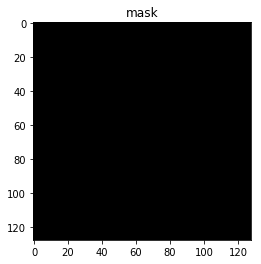

<Figure size 432x288 with 0 Axes>

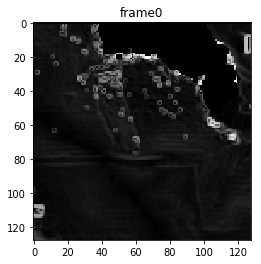

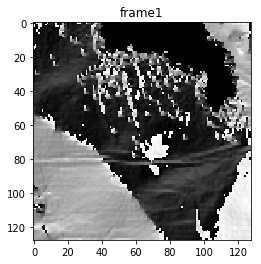

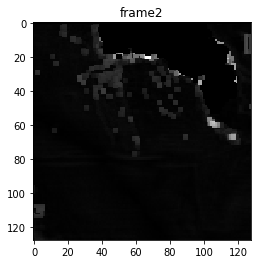

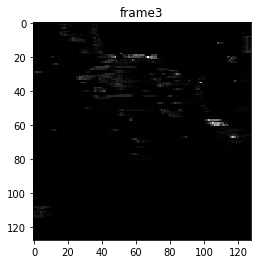

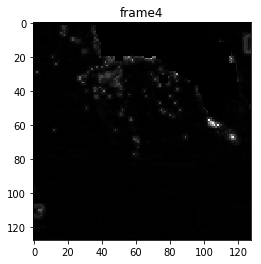

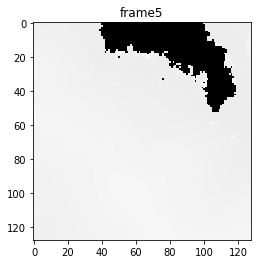

In [5]:
mask = vis( 0
   )

(128, 128)
017_068.npy
(128, 128, 6)


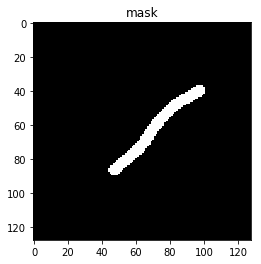

<Figure size 432x288 with 0 Axes>

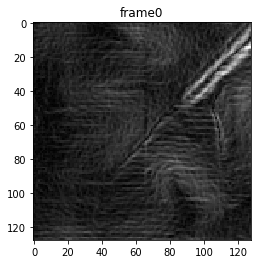

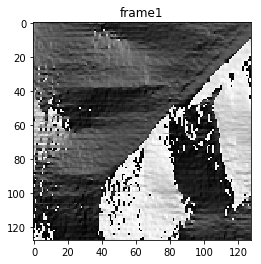

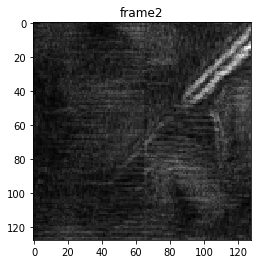

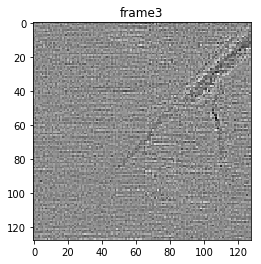

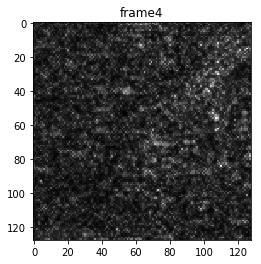

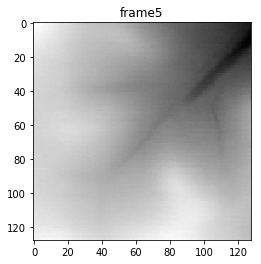

In [16]:
mask = vis( 110
   )

# Implement distanceTransform

In [94]:
from skimage import filters
edges = filters.sobel(mask)

In [114]:
def distanceToQ(mask, mode='L2'): # Q is the boundary or the outside
    #mask = 1 in, mask = 0 out 
    h,w = mask.shape
    mask = mask.reshape(h*w)
    dst = np.zeros(mask.shape, np.int64)
    for i in range(h*w):
        p = mask[i]
        if p == 0: # in the or boundary outside
            dst[i] = 0 # distance = 0
            continue
        # if in the inside
        n_dst = 10000
        for j in range(h*w):
            i_x, i_y = i%w, i//w
            j_x, j_y = j%w, j//w
            distance = np.array((i_x - j_x, i_y - j_y))
            L2 = np.linalg.norm(distance) # L2 distance
            
            if j==0 and L2<n_dst: #outside
                n_dst = L2
        dst[i] = n_dst
    dst = dst.reshape((h,w))
    return dst

In [113]:
# distance = np.array((2,3))
# L2 = np.linalg.norm(distance)
# print(L2) 


3.605551275463989


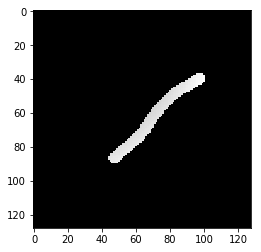

In [115]:
dst = distanceToQ(mask)
plt.imshow(dst,cmap='gray')

# Use Scipy Distance_trainsform_edt

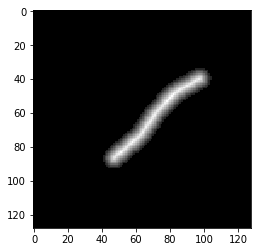

In [151]:
#distanceTransformation
from scipy import ndimage
dst = ndimage.distance_transform_edt(mask)
plt.imshow(dst,cmap='gray')

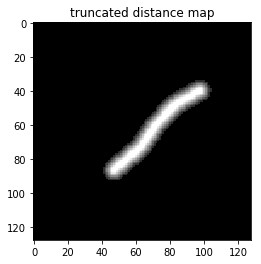

In [153]:
#Truncate it use Threshold R
R = 5.5
trun_dst = np.where(dst>R, R, dst)
plt.title('truncated distance map')
plt.imshow(trun_dst,cmap='gray')

In [146]:
print(np.min(dst),np.max(dst))
print(np.min(trun_dst),np.max(trun_dst))

0.0 7.0710678118654755
0.0 5.5


[0 1 2 3 4]


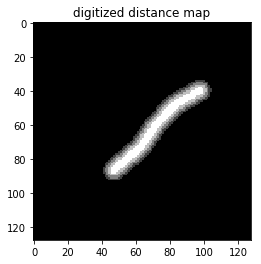

In [155]:
bins = np.array([0.0, 1.5, 3.0, 4.5,7])
quan_dist = np.digitize(trun_dst, bins, right=True)
plt.title('digitized distance map')
plt.imshow(quan_dist,cmap='gray')
print(np.unique(quan_dist))